In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [98]:
gtypes = pd.read_csv('data/matrix_genotypes.txt', sep='\t')
gExp = pd.read_csv('data/expression_matrix.txt', sep='\t')

In [ ]:
# gtypes_cols = gtypes.columns.tolist()
# gtypes_cols.sort()
# gtypes = gtypes[gtypes_cols]

# gExp_cols = gExp.columns.tolist()
# gExp_cols.sort()
# gExp = gExp[gExp_cols]

In [100]:
print(gExp.columns)
print(gExp.index)
gExp.head()

Index(['ID', '1_1_d', '1_3_d', '1_4_d', '1_5_c', '2_2_d', '2_3_d', '2_4_a',
       '2_5_d', '2_6_d',
       ...
       '22_4_d', '22_5_d', '23_3_d', '23_5_d', '24_1_d', '25_1_d', '25_3_d',
       '25_4_d', '26_1_d', '26_2_d'],
      dtype='object', length=113)
RangeIndex(start=0, stop=7085, step=1)


,ID,1_1_d,1_3_d,1_4_d,1_5_c,2_2_d,2_3_d,2_4_a,2_5_d,2_6_d,...,22_4_d,22_5_d,23_3_d,23_5_d,24_1_d,25_1_d,25_3_d,25_4_d,26_1_d,26_2_d
0,0,0.193596,0.073614,-0.029516,0.242779,0.080216,0.190502,0.148879,-0.006213,-0.001838,...,0.047797,-0.033840,-0.589592,0.059738,0.176352,0.340129,0.045428,0.043563,0.233465,0.056853
1,1,0.421468,0.364783,-0.055167,0.154739,0.366766,0.236360,0.296089,0.058330,0.011517,...,0.129272,0.160250,0.425646,0.220291,0.099491,0.405890,0.040568,0.052593,0.593716,0.168497
2,2,0.532818,-0.418089,0.524365,-0.087390,0.758338,-0.096036,-1.653630,-0.244114,0.277910,...,-0.097825,0.172960,-0.210180,-0.075213,0.198422,0.469589,0.222343,0.069883,-0.089867,-0.078562
3,3,0.051546,0.190427,0.376688,0.426257,0.093418,0.280754,-0.140367,0.276582,0.224290,...,-0.014957,-0.272955,-0.627703,0.091265,0.316825,0.369651,0.283274,0.102358,0.078381,0.278953
4,4,0.132558,0.231792,0.295131,0.469083,0.623783,0.228012,-0.136607,0.027569,0.253613,...,0.037735,-0.102276,0.254963,-0.103942,0.363442,-0.033324,-0.149047,0.212029,-0.014357,-0.072302


In [101]:
# gtypes = gtypes[gExp.columns.tolist()]
print(gtypes.columns)
print(gtypes.index)
gtypes.head()

Index(['_probePairKey', '21_5_c', '22_2_d', '19_2_c', '19_3_c', '19_4_b',
       '19_5_b', '20_1_d', '20_2_d', '20_3_c',
       ...
       '9_4_d', '9_5_d', '9_6_d', '9_7_d', '26_2_d', '19_1_c', '21_3_d',
       '21_1_d', '15_6_c', '17_1_a'],
      dtype='object', length=113)
RangeIndex(start=0, stop=2956, step=1)


,_probePairKey,21_5_c,22_2_d,19_2_c,19_3_c,19_4_b,19_5_b,20_1_d,20_2_d,20_3_c,...,9_4_d,9_5_d,9_6_d,9_7_d,26_2_d,19_1_c,21_3_d,21_1_d,15_6_c,17_1_a
0,11265_i_at_x01,1,0,0,0,2,1,1,1,1,...,0,1,0,0,1,1,2,0,0,1
1,11265_i_at_x02,1,0,0,0,2,1,1,1,1,...,0,1,0,0,1,1,2,2,0,1
2,11276_at_x12,1,0,0,0,0,1,2,1,1,...,0,1,0,0,1,1,0,0,0,1
3,11276_at_x11,1,0,0,0,0,1,1,1,1,...,0,1,0,0,1,1,0,0,0,1
4,11276_at_x10,1,0,0,0,0,1,1,1,1,...,0,1,0,0,1,1,0,0,0,1


In [ ]:
gExp['nanCount'] = gExp.apply(lambda row:row.isnull().sum(), axis=1)
gExpShort = gExp[gExp['nanCount'] < 106]
gExpShort.shape

(6609, 114)

In [28]:
print(gExpShort['nanCount'].max())
print(gExpShort.shape)

0
(1706, 114)


In [96]:
print(set(gtypes.columns) - set(gExp.columns))
print(set(gExp.columns) - set(gtypes.columns))

{'_probePairKey'}
{'ID'}


# Import the files

- read the matrices
- remove the rows with too many missing values
- replacing missing values with KNN method
- adding a noise to the gene expression dataset
- doing a transpose

In [2]:
from modules.Import import reader
expressionMatrixFile = 'data/matrix_genotypes.txt'
geneExpressionFile = 'data/expression_matrix.txt'
expressionMatrix, geneExpressionMatrix = reader(expressionMatrixFile, geneExpressionFile)

/Users/seyedpedramhashemi/venv/lib/python3.6/site-packages/missingpy/knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
/Users/seyedpedramhashemi/venv/lib/python3.6/site-packages/missingpy/knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))
/Users/seyedpedramhashemi/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
/Users/seyedpedramhashemi/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  Deprec

In [8]:
geneExpressionMatrix.index = range(geneExpressionMatrix.shape[0])

In [12]:
from modules.whiteNoise import whiteNoise
row = geneExpressionMatrix.shape[0]
col = geneExpressionMatrix.shape[1]
mu = 0
sigma = 1
noise = pd.DataFrame(
    whiteNoise(row=row, col=col, mu=mu, sigma=sigma),
    columns = geneExpressionMatrix.columns
)

In [14]:
noisyGeneExp = geneExpressionMatrix.add(noise)

In [29]:
noisyGeneExpT = noisyGeneExp.transpose()
geneExpT = geneExpressionMatrix.transpose()

# Adding a simple Autoencoder

In [32]:
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout
from livelossplot import PlotLossesKeras
from sklearn.model_selection import train_test_split

In [33]:
# train_noisy, test_noisy, train, test = train_test_split(noisyGeneExpT, geneExpT, test_size=0.3)

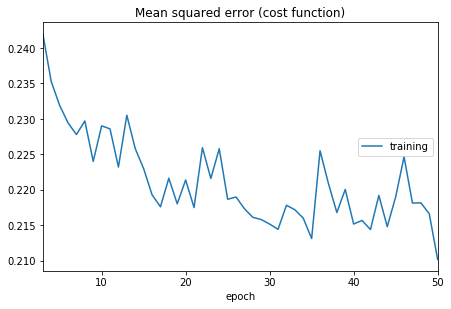

Mean squared error (cost function):
training   (min:    0.210, max:    1.294, cur:    0.210)


In [55]:
dim = noisyGeneExpT.shape[1]
autoencoder = Sequential()
autoencoder.add(Dense(units=(dim - 100), input_dim=dim, activation='relu'))
autoencoder.add(Dropout(0.5))
autoencoder.add(Dense(units=(dim - 200), activation='relu'))
autoencoder.add(Dropout(0.5))
autoencoder.add(Dense(units=(dim - 300), activation='relu'))
autoencoder.add(Dropout(.5))
autoencoder.add(Dense(units=(dim - 400), activation='relu'))
autoencoder.add(Dropout(0.5))
autoencoder.add(Dense(units=(dim - 300), activation='relu'))
autoencoder.add(Dropout(0.5))
autoencoder.add(Dense(units=(dim - 200), activation='relu'))
autoencoder.add(Dropout(.5))
autoencoder.add(Dense(units=(dim - 100), activation='relu'))
autoencoder.add(Dropout(.5))
autoencoder.add(Dense(units=(dim)))
autoencoder.compile(loss='mean_squared_error', optimizer='adam')
autoencoder.fit(
    train_noisy,
    train,
    epochs=50,
    batch_size=32,
    callbacks=[PlotLossesKeras()],
    verbose=1)

In [84]:
sAutoencoder = Sequential()
stack1 = autoencoder.layers[0:8]
for layer in stack1:
    layer.trainable = False
    sAutoencoder.add(layer)

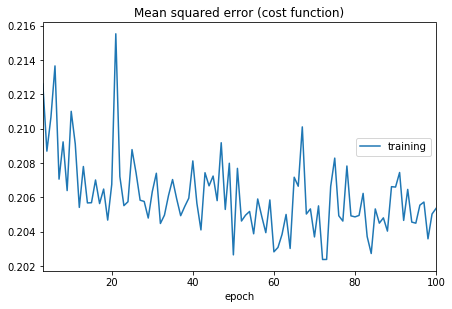

Mean squared error (cost function):
training   (min:    0.202, max:    0.216, cur:    0.205)


In [85]:
sAutoencoder.add(Dense(dim - 500, activation='relu'))
sAutoencoder.add(Dropout(.5))
sAutoencoder.add(Dense(dim - 600, activation='relu'))
sAutoencoder.add(Dropout(.5))
sAutoencoder.add(Dense(dim - 700, activation='relu'))
sAutoencoder.add(Dropout(.5))
sAutoencoder.add(Dense(dim - 600, activation='relu'))
sAutoencoder.add(Dropout(.5))
sAutoencoder.add(Dense(dim - 500, activation='relu'))
sAutoencoder.add(Dropout(.5))
sAutoencoder.add(Dense(dim - 400, activation='relu'))
sAutoencoder.add(Dropout(.5))
sAutoencoder.add(Dense(dim - 300, activation='relu'))
sAutoencoder.add(Dropout(.5))
sAutoencoder.add(Dense(dim - 200, activation='relu'))
sAutoencoder.add(Dropout(.5))
sAutoencoder.add(Dense(dim - 100, activation='relu'))
sAutoencoder.add(Dropout(.5))
sAutoencoder.add(Dense(dim))
autoencoder.compile(loss='mean_squared_error', optimizer='adam')
autoencoder.fit(
    train_noisy,
    train,
    epochs=100,
    batch_size=32,
    callbacks=[PlotLossesKeras()],
    verbose=1)

In [86]:
print(dim)

6609
